In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

matplotlib.rcParams['figure.figsize'] = (9.0, 7.0)
plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
df = pd.read_csv("train.csv")
# df = df.drop(axis=1, labels=["Id"])
df_test = pd.read_csv("test.csv")
test_idx = df_test["Id"]
# df_test = df_test.drop(axis=1, labels=["Id"])
# df_concat = pd.concat([df, df_test], axis=0, sort=False).reset_index(drop=True)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
type_group = df.columns.to_series().groupby(df.dtypes).groups
type_group

{dtype('int64'): Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object'),
 dtype('O'): Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 

In [4]:
# get feature types
from functools import reduce

numeric_f = reduce(lambda x,y: x+y, [list(type_group[f]) for f in [np.dtype('int64'), np.dtype('float64')]])
numeric_f.remove("Id")
numeric_f.remove("SalePrice")
cat_f = list(type_group[np.dtype('O')])
print(numeric_f, cat_f)

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt'] ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCon

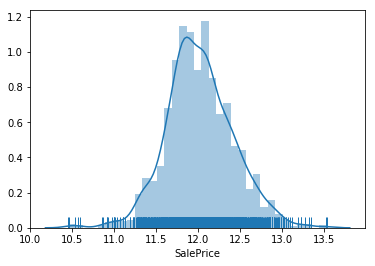

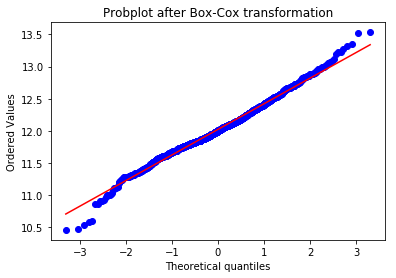

In [5]:
# target variable


sns.distplot(np.log(df["SalePrice"]), rug=True)


fig = plt.figure()
ax2 = fig.add_subplot(111)
# xt, _ = stats.boxcox(df["SalePrice"])
prob = stats.probplot(np.log(df["SalePrice"]), dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')
plt.show()

tgt_var = "log_SalePrice"
df[tgt_var] = df["SalePrice"].apply(lambda x: np.log1p(x))
# df_concat[tgt_var] = df_concat["SalePrice"].apply(lambda x: np.log1p(x))

In [6]:
# Missing values
# handle them later after inspecting corr
print("Train: ")
na_count = df.isnull().sum()
print(na_count[na_count > 0].sort_values(ascending=False))

print("\nTest: ")
na_count = df_test.isnull().sum()
print(na_count[na_count > 0].sort_values(ascending=False))

Train: 
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

Test: 
PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtF

## Numeric Features

In [7]:
# missing values
print("Train")
na_count = df[numeric_f].isnull().sum()
na_count = na_count[na_count > 0].sort_values(ascending=False)
print(na_count)

print("\nTest")
numeric_f_test = numeric_f[:]
na_count = df_test[numeric_f_test].isnull().sum()
na_count = na_count[na_count > 0].sort_values(ascending=False)
print(na_count)

Train
LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

Test
LotFrontage     227
GarageYrBlt      78
MasVnrArea       15
BsmtHalfBath      2
BsmtFullBath      2
GarageArea        1
GarageCars        1
TotalBsmtSF       1
BsmtUnfSF         1
BsmtFinSF2        1
BsmtFinSF1        1
dtype: int64


Examine Corr to identify "important" numeric features, which helps handle missing values and multicollinearity.

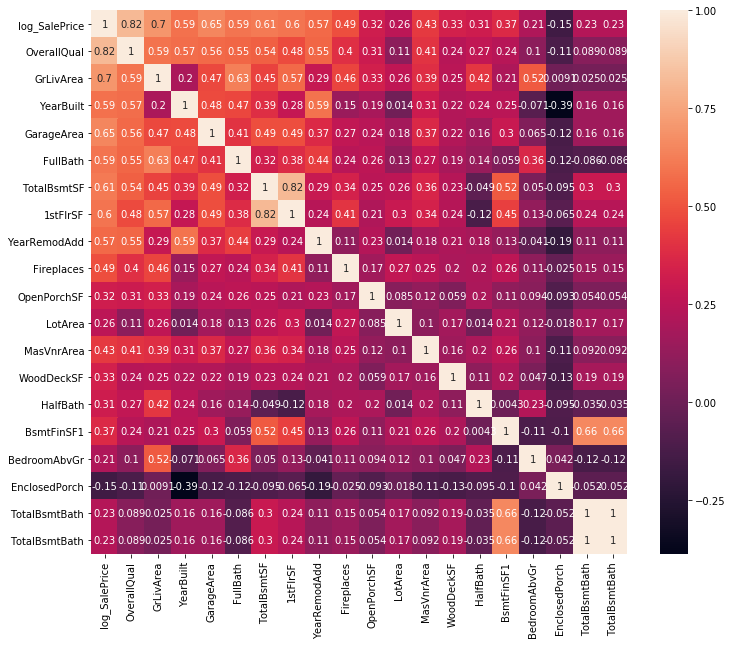

In [18]:
# Numeric Features
# identify import numeric features & highly corr pairs
plt.figure(figsize = (12, 10))
num_high_corr = df[numeric_f + [tgt_var]].corr("spearman")[tgt_var].apply(
    lambda x: np.abs(x)).sort_values(ascending=False)
num_high_corr = num_high_corr[num_high_corr >= 0.2]
sns.heatmap(df[num_high_corr.index].corr(),
           annot=True)
plt.show()

In [19]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

fill_na_df = df[numeric_f].fillna(df[numeric_f].median())

vif_cols = [x for x in numeric_f if x not in ["YearBuilt", "YearRemodAdd", "MoSold", 
                                                     "YrSold", "GarageYrBlt"]]

for i, col in enumerate(vif_cols):
    vif = variance_inflation_factor(fill_na_df.values, i)
    if vif > 5:
        print(col)
        print("VIF: {}".format(vif))

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


FullBath
VIF: 26.031145832123272
HalfBath
VIF: 6.618111863154587
TotalBsmtSF
VIF: 17097.437696497793
LotArea
VIF: 27.788487392707715
3SsnPorch
VIF: 65.13959827932699
BsmtFinSF1
VIF: 24.390411127988145
GrLivArea
VIF: 5.13497573383005
GarageArea
VIF: 20591.062460698657
OverallCond
VIF: 51.60059258756914
OpenPorchSF
VIF: 59.49791392177904
KitchenAbvGr
VIF: 10.867249797040763
PoolArea
VIF: 40.29872742889596
ScreenPorch
VIF: 21584.085165272732
MSSubClass
VIF: 34.446910819775844


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [16]:
numeric_f = numeric_f + ["TotalBsmtBath"]
numeric_f_test = numeric_f + ["TotalBsmtBath"]
df["TotalBsmtBath"] = df.BsmtFullBath + df.BsmtHalfBath
df_test["TotalBsmtBath"] = df_test.BsmtFullBath + df_test.BsmtHalfBath


AttributeError: 'DataFrame' object has no attribute 'BsmtFullBath'

In [15]:
# drop based on correlation
drop_cols = ["GarageCars", "TotRmsAbvGrd", "GarageYrBlt"]
# based on VIF
drop_cols.extend(["BsmtUnfSF", "2ndFlrSF", "BsmtFullBath", "BsmtHalfBath"])
# missing val
drop_cols.extend(["LotFrontage"])
drop_cols = set(numeric_f).intersection(set(drop_cols))

df.drop(columns = drop_cols, inplace=True)
df_test.drop(columns = drop_cols, inplace=True)

numeric_f = list(set(numeric_f) - drop_cols)
numeric_f_test = list(set(numeric_f_test) - drop_cols)

In [20]:
# handle missing values again
na_count = df[numeric_f].isnull().sum()
na_count = na_count[na_count > 0].sort_values(ascending=False)
print(na_count)
print("\n")
na_count = df_test[numeric_f_test].isnull().sum()
na_count = na_count[na_count > 0].sort_values(ascending=False)
print(na_count)

Series([], dtype: int64)


Series([], dtype: int64)


In [13]:
df["MasVnrArea"].fillna(0.0, inplace=True)
df_test["MasVnrArea"].fillna(0.0, inplace=True)

df_test["GarageArea"].fillna(df["GarageArea"].median(), inplace=True)
df_test["TotalBsmtSF"].fillna(df_test["1stFlrSF"], inplace=True)
df_test["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)
df_test["TotalBsmtBath"].fillna(df["TotalBsmtBath"].median(), inplace=True)
df_test["BsmtFinSF1"].fillna(df["BsmtFinSF1"].median(), inplace=True)
df_test["BsmtFinSF2"].fillna(df["BsmtFinSF2"].median(), inplace=True)

In [21]:
numeric_f

['BsmtFinSF2',
 'FullBath',
 'LowQualFinSF',
 'MoSold',
 'HalfBath',
 'MiscVal',
 'YearBuilt',
 'WoodDeckSF',
 'TotalBsmtSF',
 'EnclosedPorch',
 'LotArea',
 'OverallQual',
 'BedroomAbvGr',
 '3SsnPorch',
 'BsmtFinSF1',
 'YearRemodAdd',
 '1stFlrSF',
 'GrLivArea',
 'GarageArea',
 'OverallCond',
 'OpenPorchSF',
 'YrSold',
 'KitchenAbvGr',
 'PoolArea',
 'Fireplaces',
 'ScreenPorch',
 'MSSubClass',
 'TotalBsmtBath',
 'MasVnrArea',
 'TotalBsmtBath']

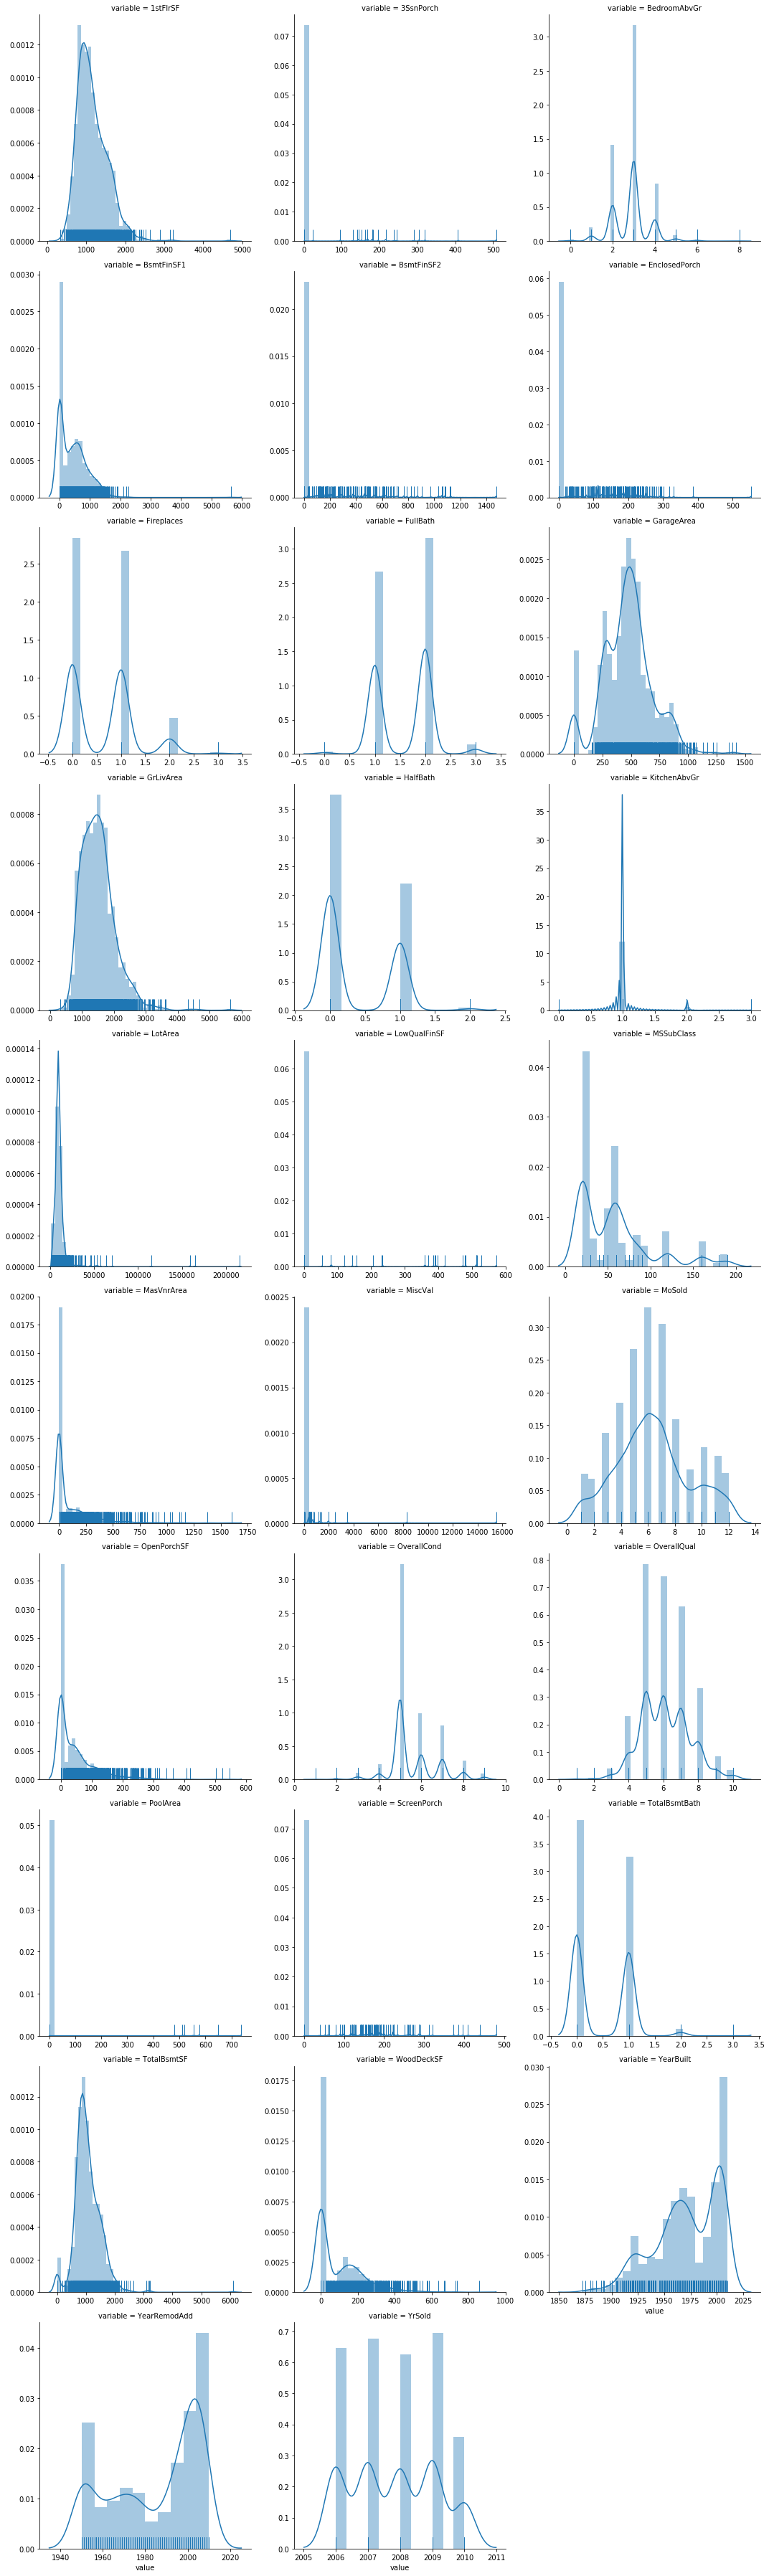

In [22]:
g = sns.FacetGrid(pd.melt(df, value_vars=sorted(numeric_f)), col='variable', col_wrap = 3, height=5, 
                  sharex = False, sharey = False)
g.map(sns.distplot, "value", rug=True)

In [ ]:
# handle skewed cols
skew_num = df[numeric_f].apply(lambda col: np.abs(stats.skew(col))).sort_values(ascending=False)
# skew_num[skew_num > 2.0]
log_tf_col = skew_num[skew_num > 3].index

for col in log_tf_col:
    df["log_" + col] = df[col].apply(lambda x: np.log1p(x))
    df_test["log_" + col] = df_test[col].apply(lambda x: np.log1p(x))
    numeric_f.remove(col)
    numeric_f.append("log_" + col)
    numeric_f_test.remove(col)
    numeric_f_test.append("log_" + col)

In [53]:
corr_num = df[numeric_f].corr("spearman")["SalePrice"].apply(lambda x: np.abs(x)).sort_values(ascending=False)
corr_num_dict = dict(corr_num)
print(corr_num)

SalePrice        1.000000
OverallQual      0.809829
GrLivArea        0.731310
YearBuilt        0.652682
GarageArea       0.649379
FullBath         0.635957
TotalBsmtSF      0.602725
1stFlrSF         0.575408
YearRemodAdd     0.571159
Fireplaces       0.519247
OpenPorchSF      0.477561
LotArea          0.456461
MasVnrArea       0.415906
WoodDeckSF       0.353802
HalfBath         0.343008
BsmtFinSF1       0.301871
BedroomAbvGr     0.234907
EnclosedPorch    0.218394
TotalBsmtBath    0.211179
KitchenAbvGr     0.164826
OverallCond      0.129325
ScreenPorch      0.100070
MoSold           0.069432
3SsnPorch        0.065440
MiscVal          0.062727
PoolArea         0.058453
YrSold           0.029899
MSSubClass       0.007192
Name: SalePrice, dtype: float64


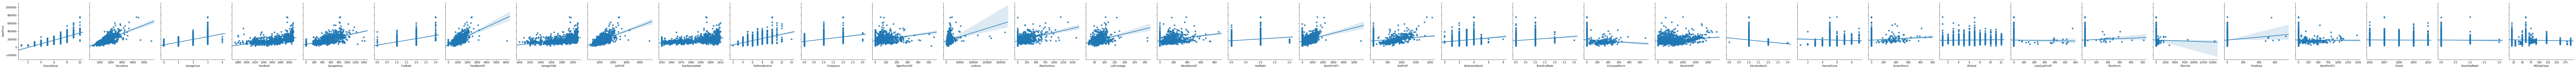

In [17]:
pp = sns.pairplot(df, height=4,
                  y_vars=['SalePrice'],
                  x_vars=corr_num.index[1:], kind='reg')

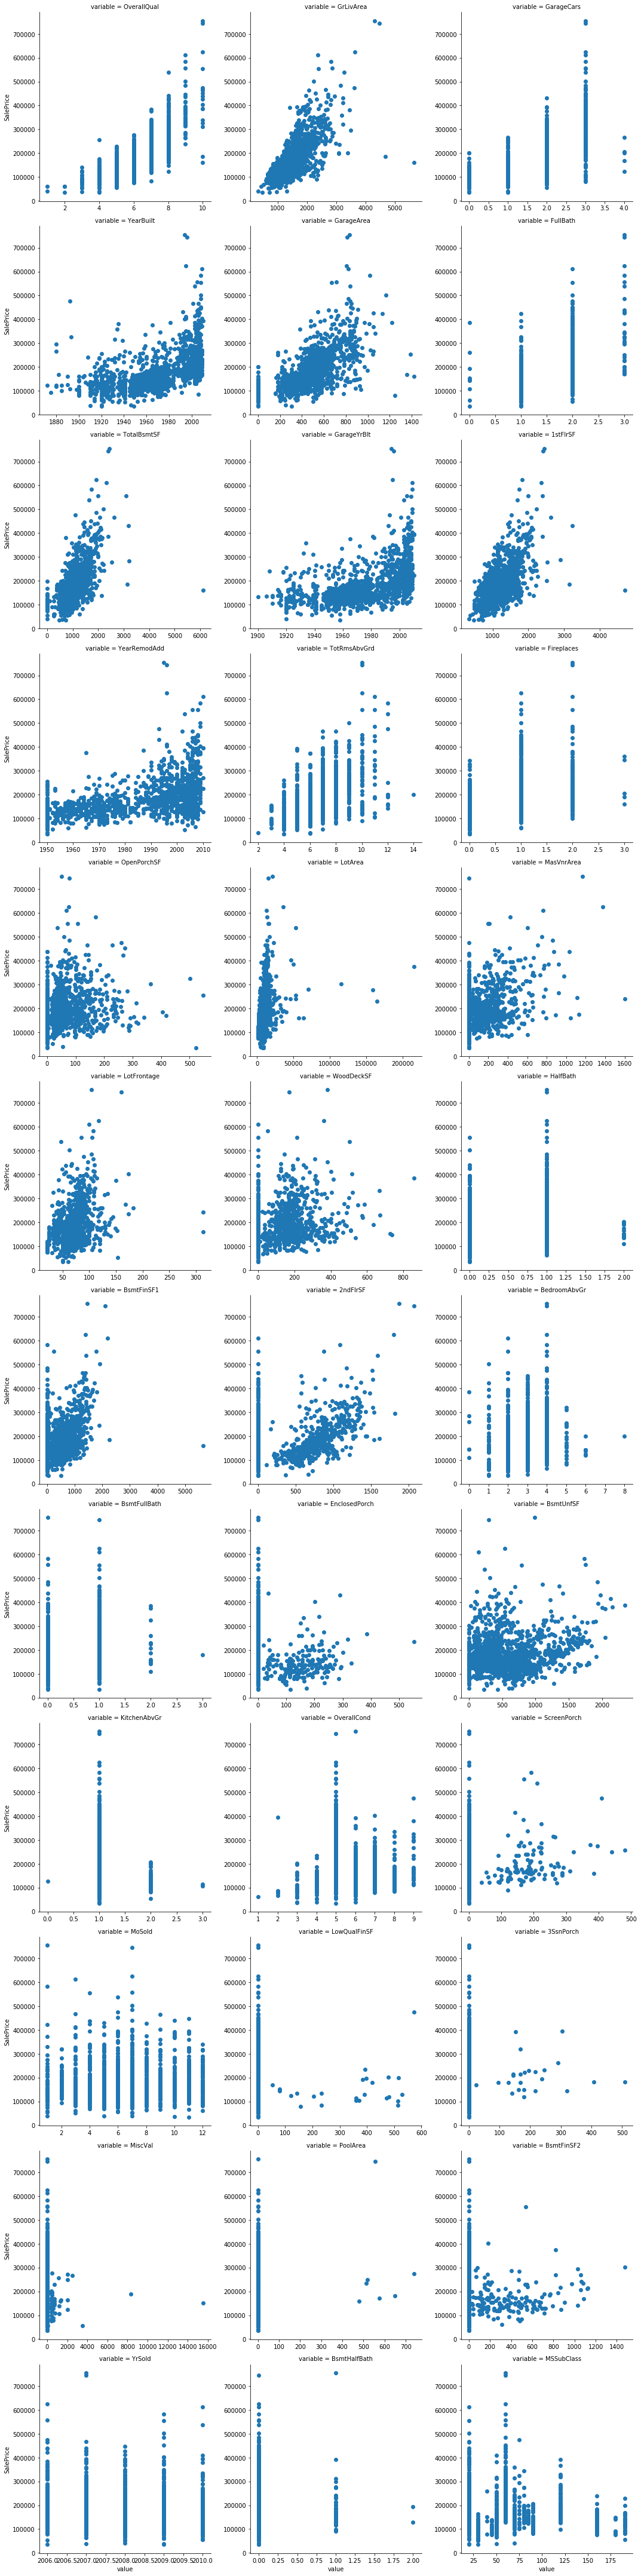

In [18]:
# order by corr
gg = sns.FacetGrid(pd.melt(df[corr_num.index], id_vars=['SalePrice']), col="variable", col_wrap=3, sharex=False, sharey=False, height=5)
gg.map(plt.scatter, "value", "SalePrice")
plt.show()

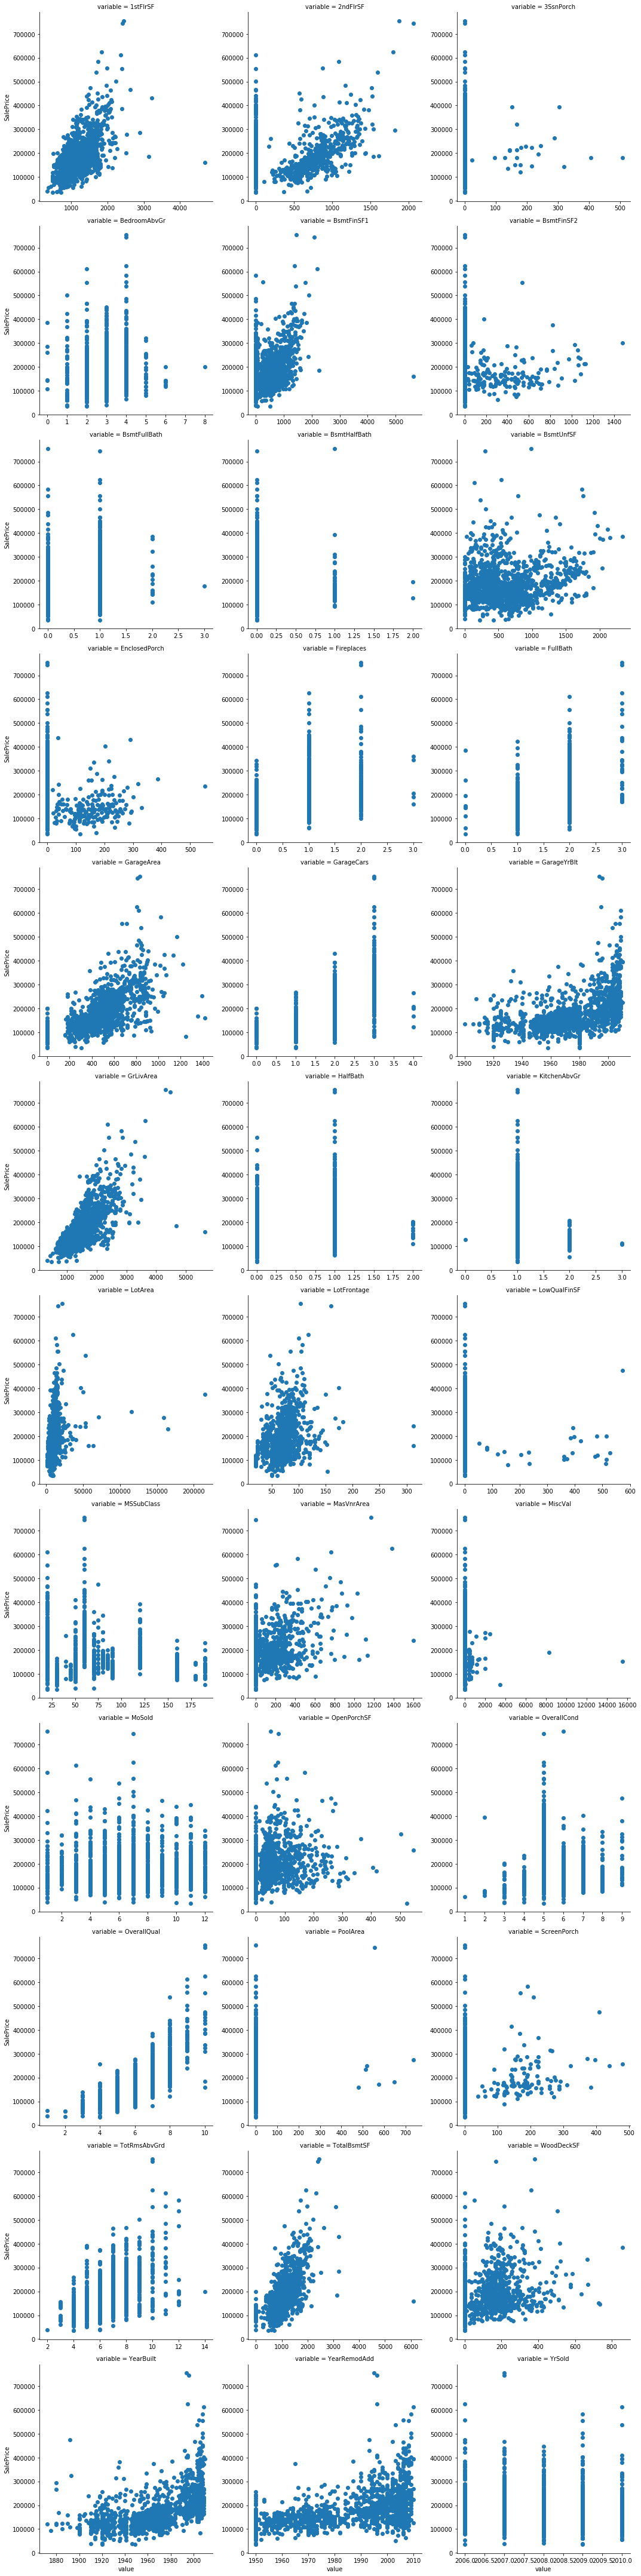

In [50]:
# order by name
gg = sns.FacetGrid(pd.melt(df[sorted(numeric_f)], id_vars=['SalePrice']), col="variable", col_wrap=3, sharex=False, sharey=False, height=5)
gg.map(plt.scatter, "value", "SalePrice")
plt.show()

In [12]:
print(corr_num.index)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt',
       'GarageArea', 'FullBath', 'TotalBsmtSF', 'GarageYrBlt', '1stFlrSF',
       'YearRemodAdd', 'TotRmsAbvGrd', 'Fireplaces', 'OpenPorchSF', 'LotArea',
       'MasVnrArea', 'LotFrontage', 'WoodDeckSF', 'HalfBath', 'BsmtFinSF1',
       '2ndFlrSF', 'BedroomAbvGr', 'BsmtFullBath', 'EnclosedPorch',
       'BsmtUnfSF', 'KitchenAbvGr', 'OverallCond', 'ScreenPorch', 'MoSold',
       'LowQualFinSF', '3SsnPorch', 'MiscVal', 'PoolArea', 'BsmtFinSF2',
       'YrSold', 'BsmtHalfBath', 'MSSubClass'],
      dtype='object')


In [38]:
# Outliers: 523, 1298
# df.loc[(df["GrLivArea"] > 4000) & (df["SalePrice"] < 500000), "GarageArea"]
# df = df.drop([1298], axis=0)
df.loc[(df["OverallQual"] == 10) & (df["SalePrice"] < 200000), "GrLivArea"]

523     4676
1298    5642
Name: GrLivArea, dtype: int64

In [14]:
# handle missing values
def fill_na(df, cols, v_list):
    for col, v in zip(cols, v_list):
        if v == "median":
            v = df[col].median()
        elif v == "mean":
            v = df[col].mean()
        df[col] = df[col].fillna(v)
        
fill_na(df, na_count.index, ["median", "median", 0.0])
fill_na(df_concat, na_count.index, ["median", "median", 0.0])
fill_na(df, ["MasVnrType"], ["None"])

In [15]:
# handle missing values
def fill_na(df, cols, v_list):
    for col, v in zip(cols, v_list):
        if v == "median":
            v = df[col].median()
        elif v == "mean":
            v = df[col].mean()
        df[col] = df[col].fillna(v)
        
fill_na(df, na_count.index, ["median", "median", 0.0])
fill_na(df_concat, na_count.index, ["median", "median", 0.0])
fill_na(df, ["MasVnrType"], ["None"])

# handle skewed cols
skew_num = df[numeric_f].apply(lambda col: np.abs(stats.skew(col))).sort_values(ascending=False)
skew_num = pd.concat([skew_num, corr_num[skew_num.index]], axis=1)
skew_num.columns = ["Skew", "Corr"]
log_tf_col = skew_num[skew_num["Skew"] > 5].index



In [24]:
# Categorical
print("Train:")
na_count = df[cat_f].isnull().sum()
print(na_count[na_count > 0].sort_values(ascending=False))
print("\nTest:")
na_count = df_test[cat_f].isnull().sum()
print(na_count[na_count > 0].sort_values(ascending=False))


Train:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrType         8
Electrical         1
dtype: int64

Test:
PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
GarageCond        78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType2      42
BsmtFinType1      42
MasVnrType        16
MSZoning           4
Utilities          2
Functional         2
KitchenQual        1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64


In [17]:
def add_miss_class(df, f):
    df[f] = df[f].astype('category')
    if df[f].isnull().any():
        print("{}, missing: {}".format(f, df[f].isnull().sum()))
        df[f] = df[f].cat.add_categories("Missing")
        df[f] = df[f].fillna("Missing")

for f in cat_f:
    add_miss_class(df, f)

Alley, missing: 1369
MasVnrType, missing: 8
BsmtQual, missing: 37
BsmtCond, missing: 37
BsmtExposure, missing: 38
BsmtFinType1, missing: 37
BsmtFinType2, missing: 38
Electrical, missing: 1
FireplaceQu, missing: 690
GarageType, missing: 81
GarageFinish, missing: 81
GarageQual, missing: 81
GarageCond, missing: 81
PoolQC, missing: 1453
Fence, missing: 1179
MiscFeature, missing: 1406


/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


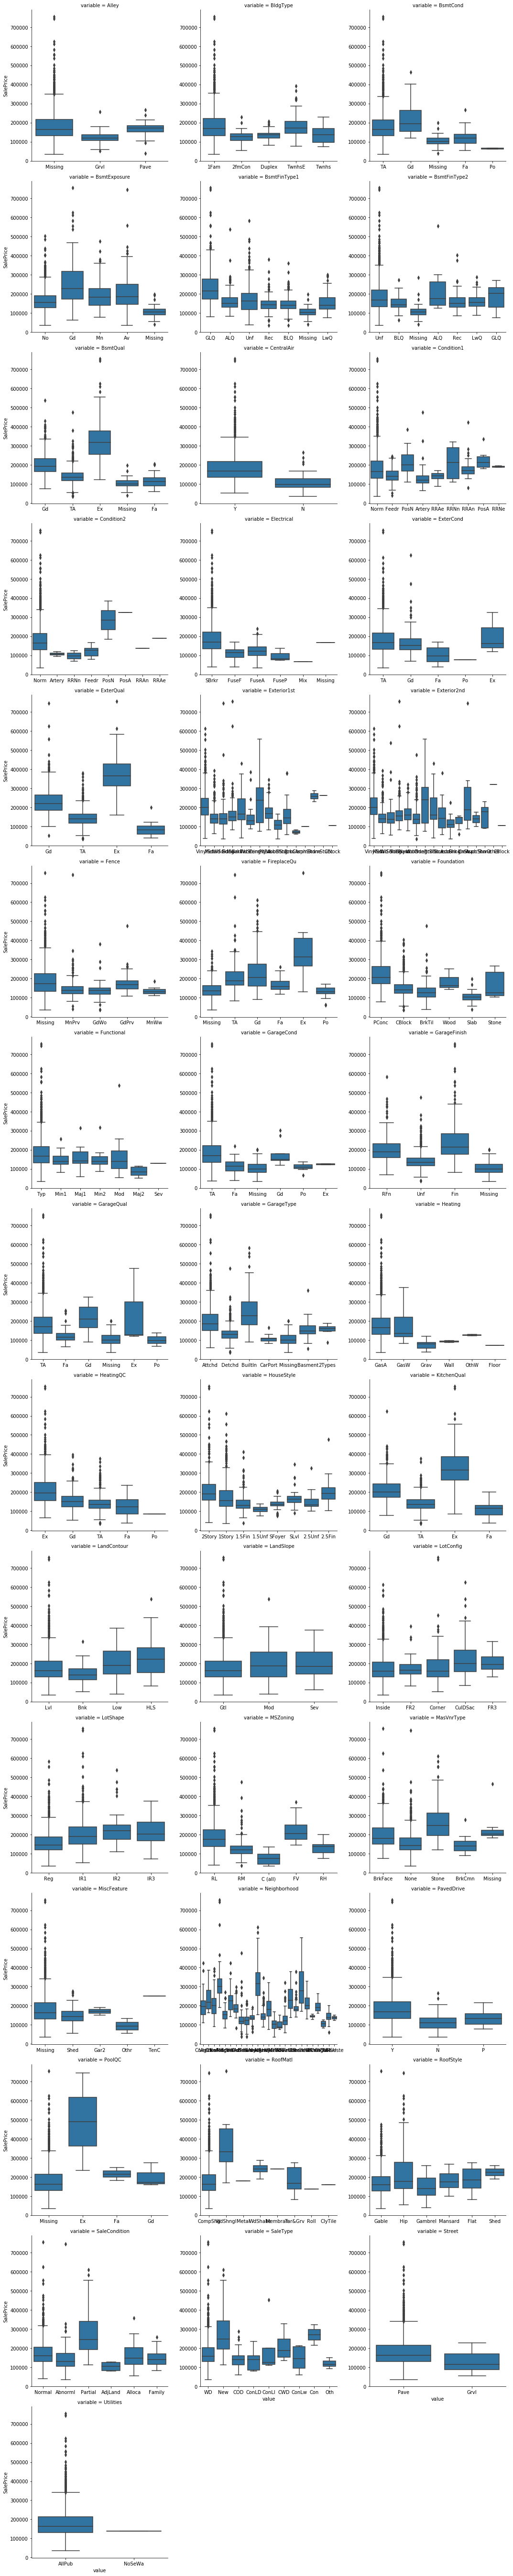

In [94]:
gg = sns.FacetGrid(pd.melt(df, id_vars=["SalePrice"], value_vars=sorted(cat_f)), col="variable",
                  col_wrap=3, sharex=False, sharey=False, height=5)
gg.map(sns.boxplot, "value", "SalePrice")

In [18]:
# anova
anv_df = pd.DataFrame()
anv_df['feature'] = cat_f
anv_pv = []

for f in cat_f:
    anv_values = []
    for v in df[f].unique():
        anv_values.append(df["SalePrice"][df[f] == v].values)
    anv = stats.f_oneway(*anv_values)
    anv_pv.append(anv.pvalue)
anv_df['pval'] = anv_pv
anv_df = anv_df.sort_values('pval', ascending=False)
anv_df 

,feature,pval
5,Utilities,5.847168e-01
7,LandSlope,1.413964e-01
1,Street,1.170486e-01
10,Condition2,4.342566e-02
40,MiscFeature,3.500367e-02
26,Heating,7.534721e-04
31,Functional,4.841697e-04
6,LotConfig,3.163167e-06
38,PoolQC,7.700989e-07
19,ExterCond,5.106681e-07


In [19]:
def encode_cat(df, f_list):
    encode_f = []
    for f in f_list:
        idx_sort = df[[f, "SalePrice"]].groupby(f).mean().sort_values("SalePrice", ascending=False).index.to_list()
        rank_dict = {k: idx+1 for idx, k in enumerate(idx_sort)}
        df[f + '_E'] = df[f].apply(lambda x: rank_dict[x])
        encode_f.append(f + '_E')
    return encode_f
    

encode_f = encode_cat(df, cat_f)

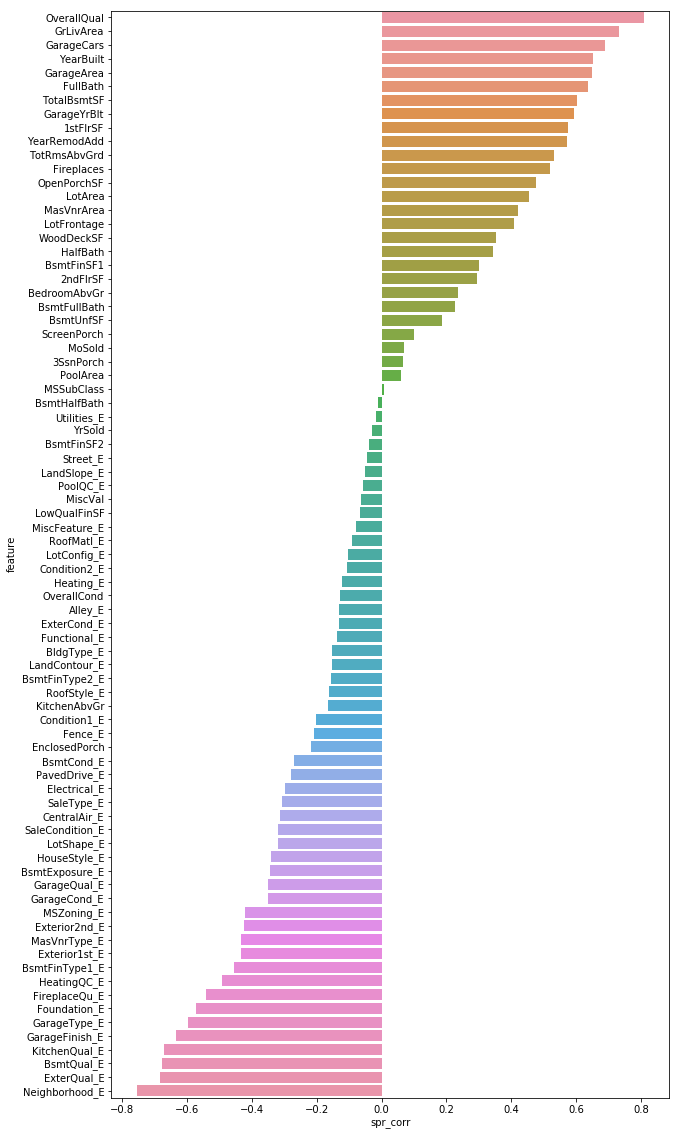

In [20]:
# Spearman Corr analysis: capture non-linear replationship
def spr_corr(df, f_list):
    f_list.remove("SalePrice")
    spr = pd.DataFrame()
    spr['feature'] = f_list
    spr['spr_corr'] = [df[f].corr(df["SalePrice"], 'spearman') for f in f_list]
    spr = spr.sort_values('spr_corr', ascending=False)
    return spr

spr_corr = spr_corr(df, (encode_f + numeric_f))
plt.figure(figsize=(10, 20))
sns.barplot(data=spr_corr, x='spr_corr', y='feature', orient='h')

In [53]:
spr_corr[np.abs(spr_corr['spr_corr']) < 0.1]

,feature,spr_corr
74,MoSold,0.069432
70,3SsnPorch,0.065440
72,PoolArea,0.058453
43,MSSubClass,0.007192
58,BsmtHalfBath,-0.012189
5,Utilities_E,-0.016710
75,YrSold,-0.029899
50,BsmtFinSF2,-0.038806
1,Street_E,-0.045814
7,LandSlope_E,-0.050310


In [54]:
df_concat = pd.concat([df[numeric_f + cat_f], df_test], axis=0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [56]:
df_concat

2919

In [108]:
df[yr_features].describe()
df["YrSinceBuilt"] = df["YrSold"] - df["YearBuilt"]
df["YrSinceRemod"] = df["YrSold"] - df["YearRemodAdd"]
df["YrSinceGarageBuilt"] = df["YrSold"] - df["GarageYrBlt"]
df["YrSinceRemod"][df["YrSinceRemod"] < 0] = df["YrSinceRemod"].mean()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,SalePrice,OverallQual
YrSold,,
2006,182549.458599,6.130573
2007,186063.151976,6.133739
2008,177360.838816,6.111842
2009,179432.103550,6.076923
2010,177393.674286,6.000000


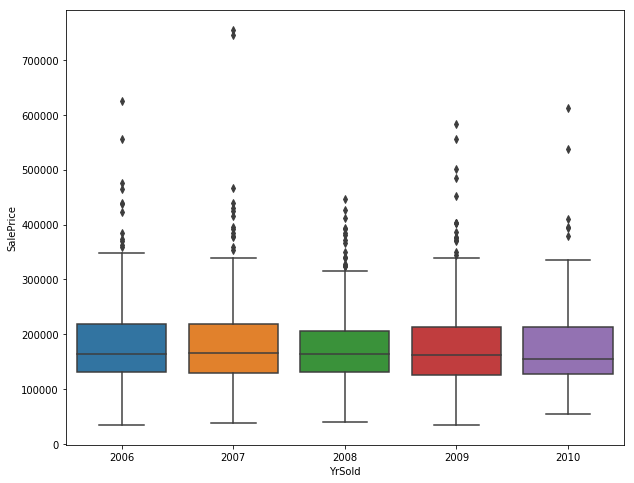

In [114]:
sns.boxplot(df["YrSold"], df["SalePrice"])
df[["YrSold", "SalePrice", "OverallQual"]].groupby("YrSold").mean()

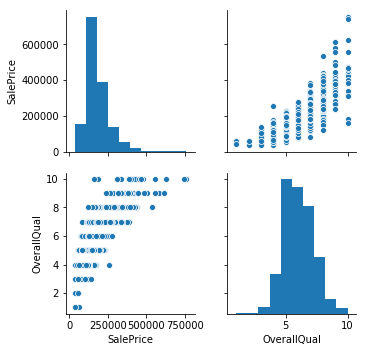

In [123]:
sns.pairplot(df[["SalePrice", "OverallQual"]])

In [61]:
yr_features = ["YearBuilt", "YearRemodAdd", 'MoSold', 'YrSold', 'GarageYrBlt']
corr = df[[x for x in df.columns if x not in yr_features]].corr()

corr.iloc[-1].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [45]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


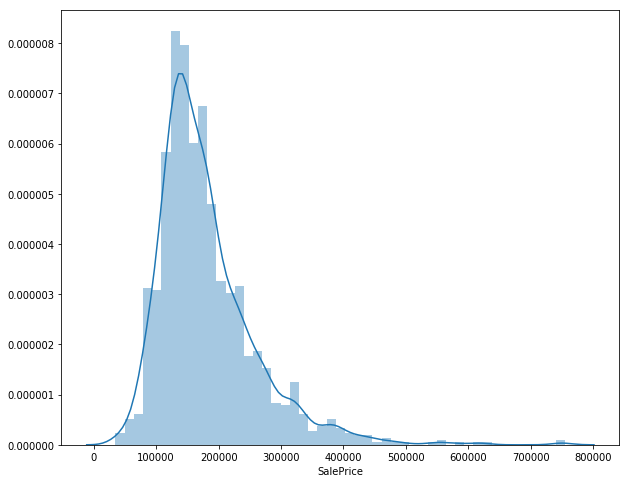

In [46]:
# EDA
sns.distplot(df["SalePrice"].astype(float))
plt.show()
# df.describe()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [ ]:
# Processing
df_cat = pd.concat([df, ])